In [43]:
from pprint import pprint
from os import listdir
from os.path import join

import numpy as np
import pandas as pd
import seaborn as sns


data_path = join(".", "data")
sample_simulation_path = join(data_path, "realistic_scenario196815")

pprint(listdir(sample_simulation_path))

['ORDERBOOK_SYM2_FULL_transacted_orders.csv',
 'ORDERBOOK_SYM1_FULL_transacted_orders.csv',
 'ORDERBOOK_ETF_FULL_transacted_orders.csv',
 'ORDERBOOK_SYM3_FULL_cleaned_orderbook.csv',
 'ORDERBOOK_ETF_FULL_cleaned_orderbook.csv',
 'ORDERBOOK_SYM3_FULL_transacted_orders.csv',
 'ORDERBOOK_SYM1_FULL_cleaned_orderbook.csv',
 'ORDERBOOK_SYM1_FULL_processed_orderbook.csv',
 'ORDERBOOK_ETF_FULL_processed_orderbook.csv',
 'ORDERBOOK_SYM3_FULL_processed_orderbook.csv',
 'plots',
 'ORDERBOOK_SYM2_FULL_processed_orderbook.csv',
 'ORDERBOOK_SYM2_FULL_cleaned_orderbook.csv']


In [44]:
import matplotlib.pyplot as plt
etf_orderbook = pd.read_csv(join(sample_simulation_path, "ORDERBOOK_ETF_FULL_processed_orderbook.csv")).rename(columns={'index': 'time'})
etf_orderbook_transacted = pd.read_csv(join(sample_simulation_path, "ORDERBOOK_ETF_FULL_transacted_orders.csv")).rename(columns={'index': 'time'})

print(etf_orderbook.columns)

Index(['time', 'ORDER_ID', 'PRICE', 'SIZE', 'BUY_SELL_FLAG', 'TYPE',
       'ask_price_1', 'ask_size_1', 'bid_price_1', 'bid_size_1', 'MID_PRICE',
       'SPREAD', 'ORDER_VOLUME_IMBALANCE', 'VWAP'],
      dtype='object')


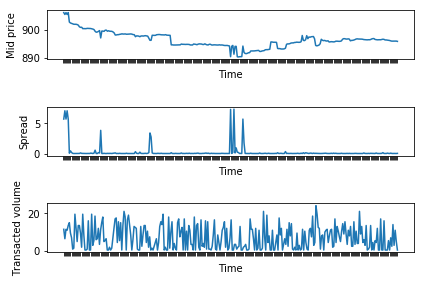

In [45]:
sample_indexes = np.linspace(start=0, stop=etf_orderbook.shape[0], num=300,
                             endpoint=False, dtype=np.int)
sample_indexes_transacted = np.linspace(start=0, stop=etf_orderbook_transacted.shape[0], num=300,
                             endpoint=False, dtype=np.int)

fig, ax = plt.subplots(3)

mid_price_ax = sns.lineplot(data=etf_orderbook.iloc[sample_indexes],
                            x="time", y="MID_PRICE", ax=ax[0])
mid_price_ax.set(xticklabels=[], xlabel="Time", ylabel="Mid price")

spread_ax = sns.lineplot(data=etf_orderbook.iloc[sample_indexes],
                         x="time", y="SPREAD", ax=ax[1])
spread_ax.set(xticklabels=[], xlabel="Time", ylabel="Spread")

size_ax = sns.lineplot(data=etf_orderbook_transacted.iloc[sample_indexes_transacted],
                         x="time", y="SIZE", ax=ax[2])
size_ax.set(xticklabels=[], xlabel="Time", ylabel="Transacted volume")
plt.tight_layout()